In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [21]:
data = {}
columns = []
with open("adding_measurments.txt") as f:
    lines_read = 0
    for line in f.readlines():
        if lines_read == 0:
            for col in line.split("\t"):
                columns.append(col)
            columns[2] = columns[2].rstrip("\n")
            for name in columns:
                data[name] = []
        else:
            row = line.split("\t")
            row[2] = row[2].rstrip("\n")
            for i, name in enumerate(columns):
                data[name].append(float(row[i].replace(',', ".")))
        lines_read+=1

In [27]:
df = pd.DataFrame(data)
df

,n,Time for LL,Time for BST
0,1099.0,0.3,0.2
1,2099.0,0.9,0.4
2,3099.0,2.0,0.6
3,4099.0,3.8,0.8
4,5099.0,6.1,1.0
...,...,...,...
94,95099.0,4732.8,23.2
95,96099.0,4840.3,23.4
96,97099.0,4949.4,23.6
97,98099.0,5058.6,23.9


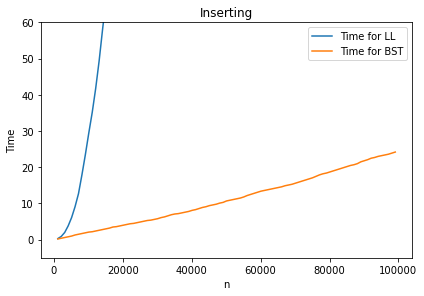

In [37]:
ax = plt.gca()
df.plot(kind = 'line', x='n', y ='Time for LL', ax = ax)
df.plot(kind = 'line', x='n', y ='Time for BST', ax = ax)
plt.tight_layout()
plt.ylim((-5,60))
plt.title("Inserting")
plt.ylabel('Time')
plt.savefig(f'inserting_plot', bbox_inches = 'tight', dpi= 200)

In [36]:
data = {}
data_over_n = {}
titles = ["Inserting n elements all structures", "Searching n elements all structures" , "Deleting n elements all structures"]
titles2 = ["Inserting element all structures", "Searching element all structures" , "Deleting element all structures"]
columns = ["Inserting LL" , "Searching LL", "Deleting LL", "Inserting BBST", "Searching BBST", "Deleting BBST", "Inserting BST", "Searching BST", "Deleting BST"]
data["n"] = [0]
data_over_n["n"] = [0]
for column in columns:
    data[column] = [0]
    data_over_n[column] = [0]

licznik = 0
with open("outcomesLinkedList.txt") as f:
    for i, line in enumerate(f.readlines()):
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        if i % 3 == 0:
            data["n"].append(int(line[0]))
            data_over_n["n"].append(int(line[0]))
            licznik+=1
        data[columns[i % 3]].append(line[1])
        data_over_n[columns[i % 3]].append(line[1]/data_over_n["n"][licznik])
        
        
licznik = 0
with open("outcomesBBST.txt") as f:
    for i, line in enumerate(f.readlines()):
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        if i % 3 == 0:
            licznik += 1
        data[columns[(i % 3) + 3]].append(line[1])
        data_over_n[columns[(i % 3) + 3]].append(line[1]/data_over_n["n"][licznik])
       
        
licznik = 0
with open("outcomesBST.txt") as f:
    for i, line in enumerate(f.readlines()):
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        if i % 3 == 0:
            licznik += 1
        data[columns[(i % 3) + 6]].append(line[1])
        
        data_over_n[columns[(i % 3) + 6]].append(line[1]/data_over_n["n"][licznik])
        

        

In [37]:
df = pd.DataFrame(data)
df


,n,Inserting LL,Searching LL,Deleting LL,Inserting BBST,Searching BBST,Deleting BBST,Inserting BST,Searching BST,Deleting BST
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5000,0.036023,0.093061,0.040904,0.004954,0.000000,0.002022,0.002991,0.000997,0.000998
2,10000,0.216622,0.545445,0.212674,0.008942,0.001995,0.003912,0.006980,0.002023,0.003984
3,15000,0.569655,1.345996,0.561807,0.012967,0.002957,0.005951,0.010969,0.003962,0.003990
4,20000,1.096094,2.530371,1.090406,0.017953,0.004986,0.012067,0.014959,0.004945,0.007021
5,25000,1.802777,4.090465,1.803102,0.022940,0.005984,0.011967,0.019904,0.005984,0.009936
6,30000,2.702514,6.392340,2.704087,0.027927,0.007978,0.014961,0.023921,0.008348,0.012319
7,35000,3.857853,8.827027,3.697939,0.032914,0.008976,0.025053,0.029009,0.009938,0.013960
8,40000,5.167912,12.060948,5.566952,0.037901,0.011968,0.041875,0.034036,0.011893,0.016955
9,45000,6.762127,16.008752,6.626874,0.043885,0.011968,0.028887,0.039028,0.014962,0.019973


In [38]:

df_over_n = pd.DataFrame(data_over_n)
df_over_n

,n,Inserting LL,Searching LL,Deleting LL,Inserting BBST,Searching BBST,Deleting BBST,Inserting BST,Searching BST,Deleting BST
0,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,5000,0.000007,0.000019,0.000008,9.908000e-07,0.000000e+00,4.044000e-07,5.982000e-07,1.994000e-07,1.996000e-07
2,10000,0.000022,0.000055,0.000021,8.942000e-07,1.995000e-07,3.912000e-07,6.980000e-07,2.023000e-07,3.984000e-07
3,15000,0.000038,0.000090,0.000037,8.644667e-07,1.971333e-07,3.967333e-07,7.312667e-07,2.641333e-07,2.660000e-07
4,20000,0.000055,0.000127,0.000055,8.976500e-07,2.493000e-07,6.033500e-07,7.479500e-07,2.472500e-07,3.510500e-07
5,25000,0.000072,0.000164,0.000072,9.176000e-07,2.393600e-07,4.786800e-07,7.961600e-07,2.393600e-07,3.974400e-07
6,30000,0.000090,0.000213,0.000090,9.309000e-07,2.659333e-07,4.987000e-07,7.973667e-07,2.782667e-07,4.106333e-07
7,35000,0.000110,0.000252,0.000106,9.404000e-07,2.564571e-07,7.158000e-07,8.288286e-07,2.839429e-07,3.988571e-07
8,40000,0.000129,0.000302,0.000139,9.475250e-07,2.992000e-07,1.046875e-06,8.509000e-07,2.973250e-07,4.238750e-07
9,45000,0.000150,0.000356,0.000147,9.752222e-07,2.659556e-07,6.419333e-07,8.672889e-07,3.324889e-07,4.438444e-07


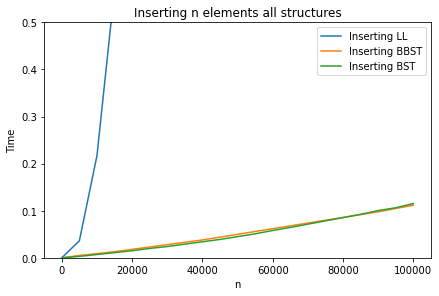

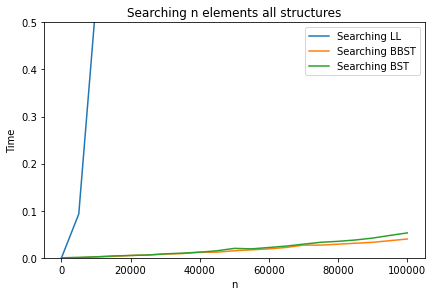

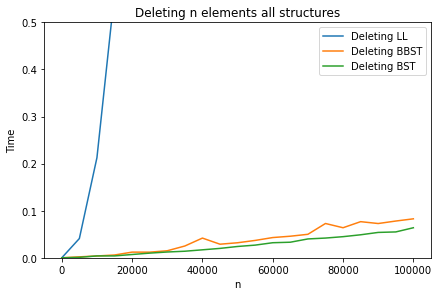

In [39]:
for i in range(3):
    ax = plt.gca()
    df.plot(kind = 'line', x='n', y =columns[i], ax = ax)
    df.plot(kind = 'line', x='n', y =columns[i+3], ax = ax)
    df.plot(kind = 'line', x='n', y =columns[i+6], ax = ax)
    plt.tight_layout()
    plt.ylim((0,0.5))
    plt.title(titles[i])
    plt.ylabel('Time')
    plt.savefig(f'{titles[i]}_plot', bbox_inches = 'tight', dpi= 200)
    plt.show()
    #plt.cla()


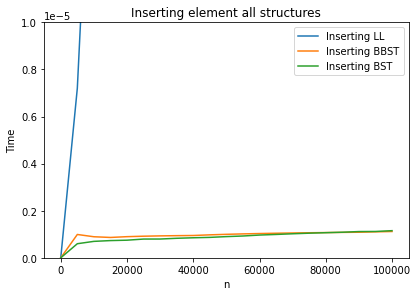

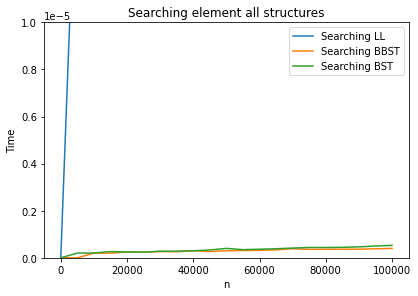

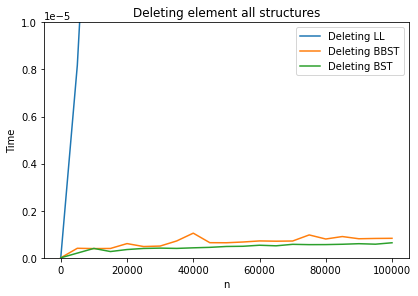

In [40]:
for i in range(3):
    ax = plt.gca()
    df_over_n.plot(kind = 'line', x='n', y =columns[i], ax = ax)
    df_over_n.plot(kind = 'line', x='n', y =columns[i+3], ax = ax)
    df_over_n.plot(kind = 'line', x='n', y =columns[i+6], ax = ax)
    plt.tight_layout()
    plt.ylim((0,0.00001))
    plt.title(titles2[i])
    plt.ylabel('Time')
    plt.savefig(f'{titles2[i]}_plot', bbox_inches = 'tight', dpi= 200)
    plt.show()
    #plt.cla()

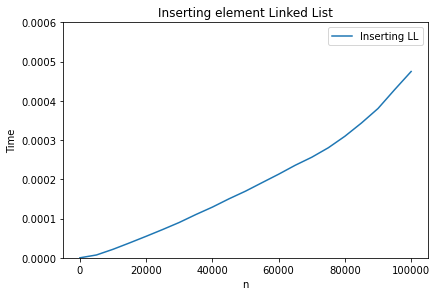

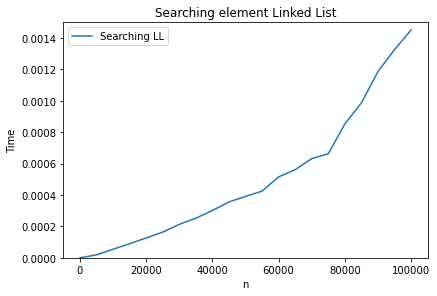

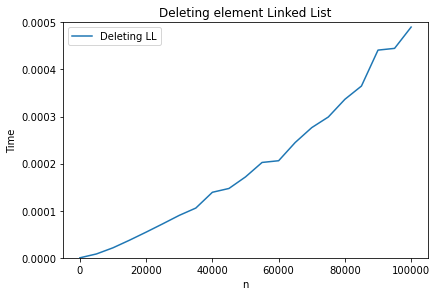

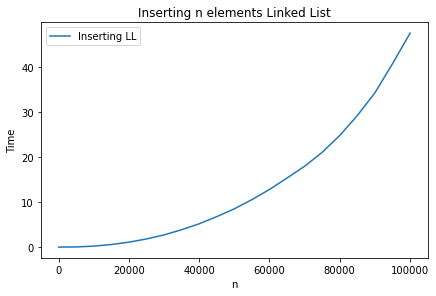

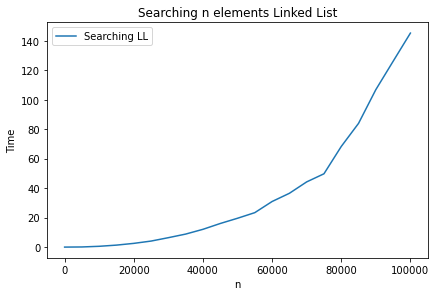

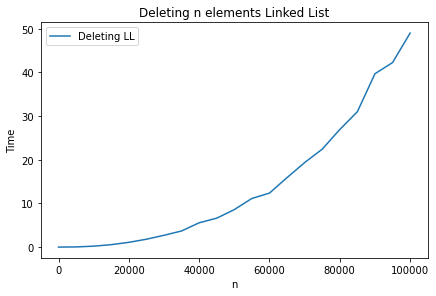

In [41]:
scales = [0.0006, 0.0015,0.0005 ]
for i in range(3):
    ax = plt.gca()
    df_over_n.plot(kind = 'line', x='n', y =columns[i], ax = ax)
    plt.tight_layout()
    plt.ylim((0,scales[i]))
    plt.title(f"{columns[i][:len(columns[i])-3]} element Linked List")
    plt.ylabel('Time')
    plt.savefig(f'{columns[i]}_only_LL_plot_overn', bbox_inches = 'tight', dpi= 200)
    plt.show()
    #plt.cla()
    
 
for i in range(3):
    ax = plt.gca()
    df.plot(kind = 'line', x='n', y =columns[i], ax = ax)
    plt.tight_layout()
   # plt.ylim((0,scales[i]))
    plt.title(f"{columns[i][:len(columns[i])-3]} n elements Linked List")
    plt.ylabel('Time')
    plt.savefig(f'{columns[i]}_only_LL_plot', bbox_inches = 'tight', dpi= 200)
    plt.show()
    #plt.cla()
    

In [42]:
BST_worst = {}
columns = ["Inserting BST", "Searching BST", "Deleting BST", "Inserting_Worst_BST", "Searching_worst_BST", "Deleting_Worst_BST"]
BST_worst["n"] = [0]

for column in columns:
    BST_worst[column] = [0]


licznik = 0
with open("outcomesBST.txt") as f:
    for i, line in enumerate(f.readlines()):
        if i == 18: break
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        if i % 3 == 0:
            BST_worst["n"].append(int(line[0]))
            licznik+=1
        BST_worst[columns[i % 3]].append(line[1])
        
        
licznik = 0
with open("outcomesBSTWorst_Case.txt") as f:
    for i, line in enumerate(f.readlines()):
        if i == 18: break
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        if i % 3 == 0:
            licznik += 1
        BST_worst[columns[(i % 3) + 3]].append(line[1])

In [43]:
# print(BST_worst)
# for values in BST_worst.values():
#     print(len(values))
df_BST_worst = pd.DataFrame(BST_worst)
df_BST_worst


,n,Inserting BST,Searching BST,Deleting BST,Inserting_Worst_BST,Searching_worst_BST,Deleting_Worst_BST
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5000,0.002991,0.000997,0.000998,0.073084,0.050925,0.043062
2,10000,0.006980,0.002023,0.003984,0.304479,0.221568,0.085857
3,15000,0.010969,0.003962,0.003990,0.695754,0.500863,0.134645
4,20000,0.014959,0.004945,0.007021,1.247053,0.914566,0.173895
5,25000,0.019904,0.005984,0.009936,1.965351,1.390835,0.214890
6,30000,0.023921,0.008348,0.012319,2.835035,2.042771,0.253909


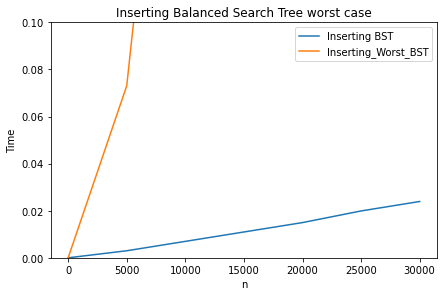

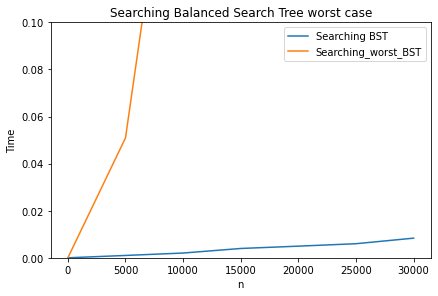

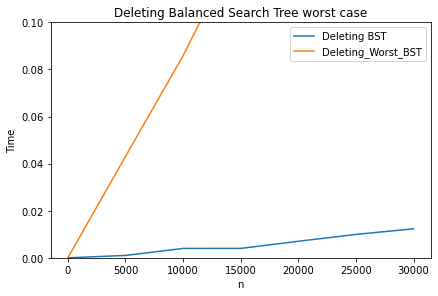

In [44]:
titles = ["Inserting", "Searching", "Deleting"]
for i in range(3):
    ax = plt.gca()
    df_BST_worst.plot(kind = 'line', x='n', y =columns[i], ax = ax)
    df_BST_worst.plot(kind = 'line', x='n', y =columns[i+3], ax = ax)
    plt.tight_layout()
    plt.ylim((0,0.1))
    plt.title(f"{titles[i]} Balanced Search Tree worst case")
    plt.ylabel('Time')
    
    plt.savefig(f'{titles[i]}_Wors_case_BST', bbox_inches = 'tight', dpi= 200)
    plt.show()
    #plt.cla()
    

In [45]:
df_styled = df.set_index("n").style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled ,"mytable2.png")

In [46]:
df_worst_styled = df_BST_worst.set_index("n").style.background_gradient(axis=1) #adding a gradient based on values in cell
dfi.export(df_worst_styled ,"worstBSTtable.png")

In [47]:
recursive_depth = {}
columns = ["BST" , "BBST"]
recursive_depth["n"] = []
for column in columns:
    recursive_depth[column] = []

with open("recursive_BST.txt", "r") as f:
    for line in f.readlines():
        line = [int(x.rstrip("\n")) for x in line.split(" ")]
        recursive_depth["n"].append(line[0])
        recursive_depth[columns[0]].append(line[1])
        
with open("recursive_BBST.txt", "r") as f:
    for line in f.readlines():
        line = [int(x.rstrip("\n")) for x in line.split(" ")]
        recursive_depth[columns[1]].append(line[1])
        
        


In [48]:
df_rec = pd.DataFrame(recursive_depth)
df_rec
dfi.export(df_rec.set_index("n") ,"Recursive_depth_table.png")

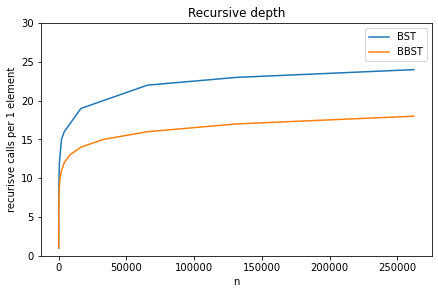

In [49]:
ax = plt.gca()
df_rec.plot(kind = 'line', x='n', y =columns[0], ax = ax)
df_rec.plot(kind = 'line', x='n', y =columns[1], ax = ax)
plt.tight_layout()
plt.ylim((0,30))
plt.title(f"Recursive depth")
plt.ylabel('recurisve calls per 1 element')
    
plt.savefig(f'Recursive_depth', bbox_inches = 'tight', dpi= 200)
plt.show()

In [50]:
BBSTvsBST = {}

titles = ["Inserting", "Searching"]
columns = [ "Inserting BBST", "Searching BBST", "Inserting BST", "Searching BST"]
for column in columns:
    BBSTvsBST[column] = [0]

BBSTvsBST["n"] = [0]

with open("outcomesBBST300.txt") as f:
    for i, line in enumerate(f.readlines()):
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        if i % 2 == 0:
            BBSTvsBST["n"].append(line[0])
        BBSTvsBST[columns[(i % 2)]].append(line[1]) 
        
with open("outcomesBST300k.txt") as f:
    for i, line in enumerate(f.readlines()):
        line = [float(x.rstrip("\n")) for x in line.split(" ")]
        BBSTvsBST[columns[(i % 2) + 2]].append(line[1])     

In [51]:
df_300 = pd.DataFrame(BBSTvsBST)
df_300

,Inserting BBST,Searching BBST,Inserting BST,Searching BST,n
0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.004028,0.000997,0.002994,0.000996,5000.0
2,0.008977,0.001034,0.006985,0.001996,10000.0
3,0.012993,0.002964,0.010968,0.001996,15000.0
4,0.018015,0.003997,0.013961,0.004988,20000.0
...,...,...,...,...,...
56,0.433567,0.161878,0.328678,0.202947,280000.0
57,0.442546,0.162218,0.335660,0.231246,285000.0
58,0.450524,0.165971,0.347628,0.210943,290000.0
59,0.459498,0.179836,0.354611,0.229816,295000.0


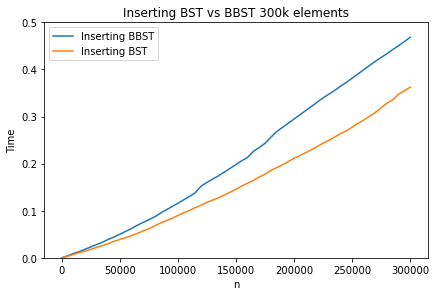

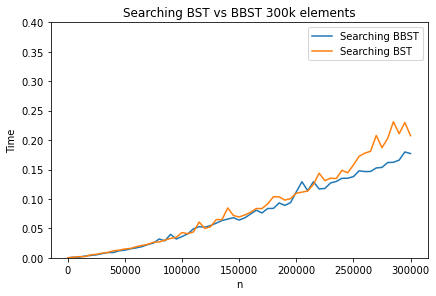

In [52]:
limits = [0.5,0.4]
for i in range(2):
    ax = plt.gca()
    df_300.plot(kind = 'line', x='n', y =columns[i], ax = ax)
    df_300.plot(kind = 'line', x='n', y =columns[i+2], ax = ax)
    plt.tight_layout()
    plt.ylim((0,limits[i]))
    plt.title(f"{titles[i]} BST vs BBST 300k elements")
    plt.ylabel('Time')
    plt.savefig(f'{titles[i]}300k_plot', bbox_inches = 'tight', dpi= 200)
    plt.show()